In [1]:
import pandas as pd

In [2]:
DATA_DIR ='data/Marital satisfaction_Data.xlsx'
allsheets = pd.read_excel(DATA_DIR, sheet_name=None, header=2)
allsheets.keys()

odict_keys(['Arkusz1', 'Arkusz2', 'Arkusz3'])

In [3]:
df = allsheets['Arkusz1']
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,National level,Unnamed: 24,Unnamed: 25,Unnamed: 26,Individual level,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Brazil,1,21.0,2.0,0,0,5,3,1.0,4,...,7,7,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1.0,6,...,6,6,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1.0,4,...,7,7,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1.0,6,...,6,6,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1.0,5,...,6,7,3,2,3,2,1,1,1,1


In [4]:
#df = df.loc[1:,:]
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,National level,Unnamed: 24,Unnamed: 25,Unnamed: 26,Individual level,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Brazil,1,21.0,2.0,0,0,5,3,1.0,4,...,7,7,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1.0,6,...,6,6,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1.0,4,...,7,7,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1.0,6,...,6,6,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1.0,5,...,6,7,3,2,3,2,1,1,1,1


In [5]:
mrq_cols = range(11,20)
kansas_cols = range(20, 23)

MRQ = df.iloc[:,mrq_cols].mean(axis=1)
KANSAS = df.iloc[:, kansas_cols].mean(axis=1)

In [6]:
display(MRQ.head())
display(KANSAS.head())

0    1.222222
1    1.111111
2    1.333333
3    1.222222
4    1.222222
dtype: float64

0    7.000000
1    6.000000
2    7.000000
3    6.000000
4    6.666667
dtype: float64

In [7]:
col_names = ['country', 
            'sex',
            'age',
            'marriage_duration',
            'n_children',
            'n_broughtup_children',
            'education',
            'material_status',
            'religion',
            'religiousity',
            'pension',
            'mrq',
            'kansas']

In [8]:
col_names.index('pension')

10

In [9]:
data = pd.concat([df.iloc[:, :11],
                 MRQ,
                 KANSAS], axis=1)
# Some data cleaning and type enforcing
data.columns = col_names
data['country'] = data['country'].str.strip().astype('category')
data['sex'] = data['sex'].map({1:'male', 2:'female'}).astype('category')

for col in col_names[col_names.index('age'): col_names.index('pension') + 1]:
    try:
        data[col] = data[col].astype(int)
    except:
        pass

data['age_at_marriage'] = data['age'] - data['marriage_duration']

# Take note for religion, there are some missing values. Maybe default to other?
data.isna().sum(axis=0)

country                  0
sex                      0
age                      0
marriage_duration        0
n_children               0
n_broughtup_children     0
education                0
material_status          0
religion                86
religiousity             0
pension                  0
mrq                      0
kansas                   0
age_at_marriage          0
dtype: int64

# Proper dataframe here, can start playing around after this point

In [10]:
data.head()

,country,sex,age,marriage_duration,n_children,n_broughtup_children,education,material_status,religion,religiousity,pension,mrq,kansas,age_at_marriage
0,Brazil,male,21,2,0,0,5,3,1.0,4,4,1.222222,7.000000,19
1,Brazil,male,29,3,1,0,5,3,1.0,6,5,1.111111,6.000000,26
2,Brazil,male,30,7,0,0,5,3,1.0,4,4,1.333333,7.000000,23
3,Brazil,male,30,7,1,1,5,3,1.0,6,7,1.222222,6.000000,23
4,Brazil,male,28,9,0,0,4,2,1.0,5,7,1.222222,6.666667,19


In [11]:
def groupby_mean(input_df, col_of_interest, happiness_metric):
    '''
    Helper function, gets relevant columns for plotting and groups column 
    of interest by the average of the happiness metric ('mrq' or 'kansas')
    '''
    relevant_df = input_df.loc[:, [col_of_interest,'age_at_marriage', happiness_metric]]
    output = relevant_df.groupby([col_of_interest, 'age_at_marriage'], as_index=False).mean()
    return output

def plot_filter(input_df, col_of_interest, filter_by, happiness_metric):
    '''
    Plots each happiness metric ('mrq' or 'kansas') against age_at_marriage, 
    filtered by desired condition
    '''
    relevant_df = input_df.loc[:, [col_of_interest, 'age_at_marriage', happiness_metric]]
    output = relevant_df.loc[relevant_df[col_of_interest] == filter_by, :]
    output.plot(x='age_at_marriage', y=happiness_metric,kind='scatter', title=f'Marital satisfaction by age at marriage for {filter_by}');

def plot_group(input_df, col_of_interest, filter_by, happiness_metric):
    '''
    Plots the average happiness metric ('mrq' or 'kansas') against age_at_marriage, 
    filtered by desired condition
    '''
    #relevant_df = input_df.loc[:, [col_of_interest, 'age_at_marriage', happiness_metric]]
    relevant_df = groupby_mean(input_df, col_of_interest, happiness_metric)
    output = relevant_df.loc[relevant_df[col_of_interest] == filter_by, :]
    output.plot(x='age_at_marriage', y=happiness_metric,kind='scatter', title=f'Average marital satisfaction by age at marriage for {filter_by}');

In [12]:
MRQ_overall = data.loc[:, ['age_at_marriage', 'mrq']]
MRQ_overall.head()


,age_at_marriage,mrq
0,19,1.222222
1,26,1.111111
2,23,1.333333
3,23,1.222222
4,19,1.222222


In [13]:
MRQ_overall.groupby('age_at_marriage', as_index=False).mean()['age_at_marriage'].unique()#.plot(x='age_at_marriage', y='mrq',kind='scatter');

array([ 0,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58,
       59, 61, 62, 65, 68, 70])

In [14]:
MRQ_with_country = data.loc[:, ['country','age_at_marriage', 'mrq']]
MRQ_with_country.head()

,country,age_at_marriage,mrq
0,Brazil,19,1.222222
1,Brazil,26,1.111111
2,Brazil,23,1.333333
3,Brazil,23,1.222222
4,Brazil,19,1.222222


In [15]:
plot_group(data, 'country', 'Brazil', 'mrq')

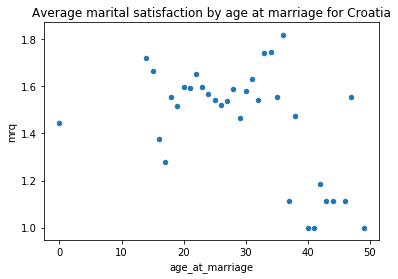

In [16]:
plot_group(data, 'country', 'Croatia', 'mrq')

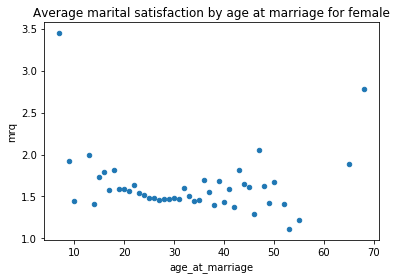

In [17]:
plot_group(data, 'sex', 'female', 'mrq')

# Vary the columns and metric to plot by

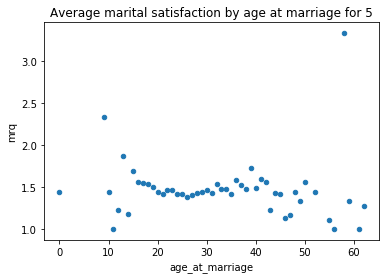

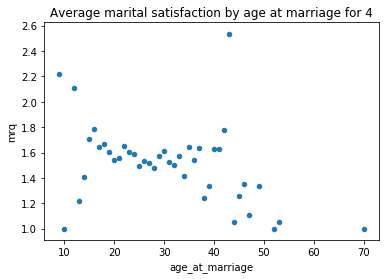

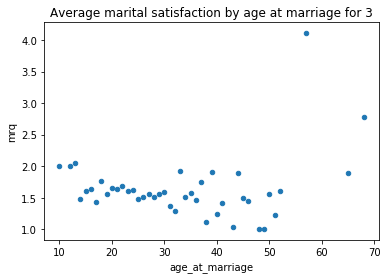

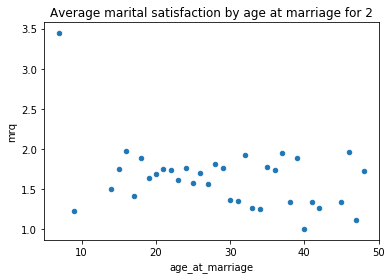

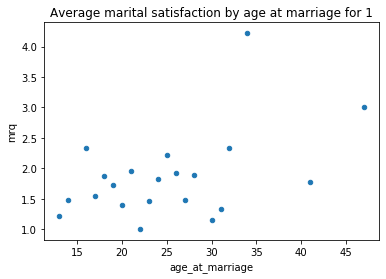

In [18]:
# Choose all groups to plot in col of interest

col = 'education'
metric = 'mrq'
for group in data[col].unique():
    plot_group(data, col, group, metric)